<a href="https://colab.research.google.com/github/Ashraf1292/Thesis-Fake_jobs-/blob/main/POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

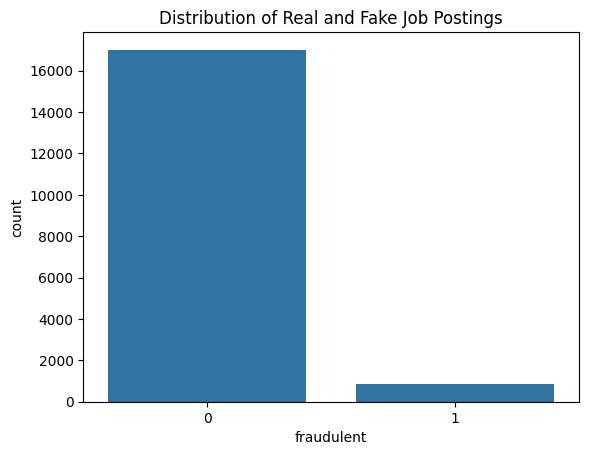

Accuracy of the Linear SVC model: 97.06%
Precision: 63.93%
Recall: 90.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.64      0.90      0.75       173

    accuracy                           0.97      3576
   macro avg       0.82      0.94      0.87      3576
weighted avg       0.98      0.97      0.97      3576

Best Hyperparameters: {'C': 10}
Best Cross-Validation Accuracy: 0.9992828961994272


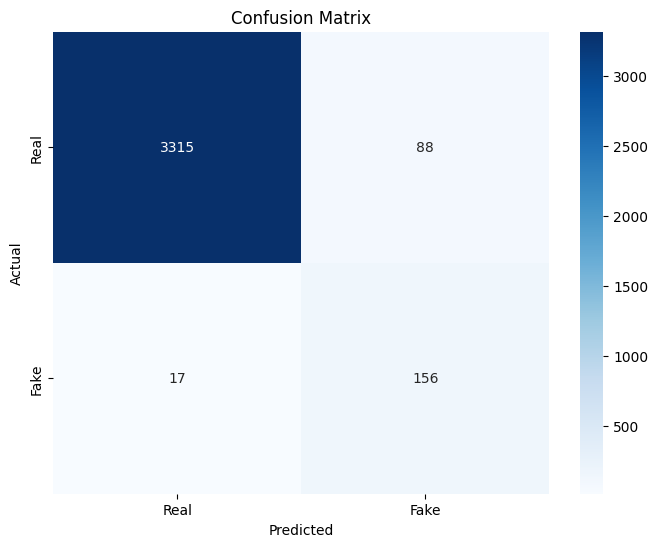

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN  # Corrected import
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
df['text'] = df['title'].fillna('') + ' ' + \
            df['location'].fillna('') + ' ' + \
            df['department'].fillna('') + ' ' + \
            df['company_profile'].fillna('') + ' ' + \
            df['description'].fillna('') + ' ' + \
            df['requirements'].fillna('') + ' ' + \
            df['benefits'].fillna('')

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Oversampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42, n_jobs=-1)  # Corrected class name
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Step 8: Train the Linear SVC model
svc = LinearSVC(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the Linear SVC model: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

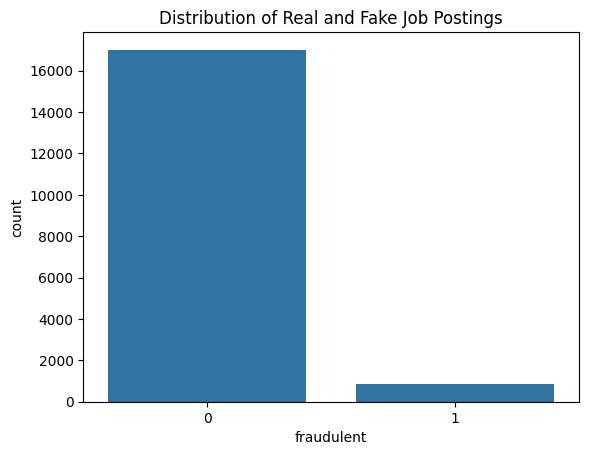

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:59:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:00:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
df['text'] = df['title'].fillna('') + ' ' + \
             df['location'].fillna('') + ' ' + \
             df['department'].fillna('') + ' ' + \
             df['company_profile'].fillna('') + ' ' + \
             df['description'].fillna('') + ' ' + \
             df['requirements'].fillna('') + ' ' + \
             df['benefits'].fillna('')

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Oversampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42, n_jobs=-1)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Step 8: Train the RF and XGBoost ensemble model
# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}

# Tune Random Forest
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_res, y_train_res)
best_rf = rf_grid_search.best_estimator_

# Tune XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train_res, y_train_res)
best_xgb = xgb_grid_search.best_estimator_

# Create the ensemble (soft voting)
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

# Train the ensemble
ensemble.fit(X_train_res, y_train_res)

# Step 9: Evaluate the model
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the Ensemble model: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display results
print("RF Best Hyperparameters:", rf_grid_search.best_params_)
print("RF Best Cross-Validation Accuracy:", rf_grid_search.best_score_)
print("XGBoost Best Hyperparameters:", xgb_grid_search.best_params_)
print("XGBoost Best Cross-Validation Accuracy:", xgb_grid_search.best_score_)

# Feature importance
feature_names = tfidf.get_feature_names_out()
rf_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False).head(20)

# Plot RF feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=rf_importances)
plt.title('Top 20 Features by Random Forest Importance')
plt.tight_layout()
plt.show()

# XGBoost feature importance
xgb_importance = best_xgb.get_booster().get_score(importance_type='weight')
xgb_importance = sorted(xgb_importance.items(), key=lambda x: x[1], reverse=True)
xgb_df = pd.DataFrame(xgb_importance[:20], columns=['feature_idx', 'importance'])
xgb_df['feature'] = xgb_df['feature_idx'].apply(lambda x: feature_names[int(x.replace('f', ''))])

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=xgb_df)
plt.title('Top 20 Features by XGBoost Importance')
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

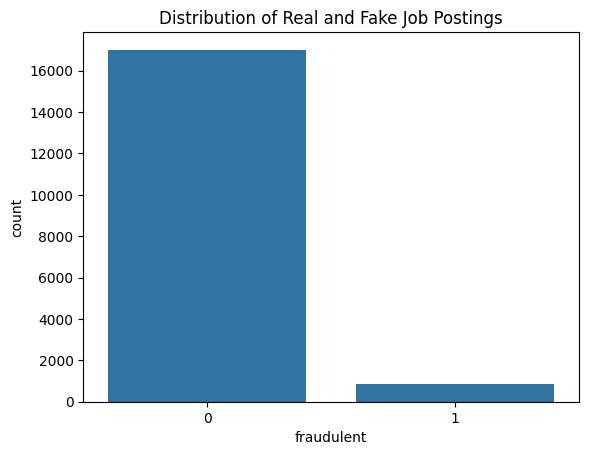

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
df['text'] = df['title'].fillna('') + ' ' + \
             df['location'].fillna('') + ' ' + \
             df['department'].fillna('') + ' ' + \
             df['company_profile'].fillna('') + ' ' + \
             df['description'].fillna('') + ' ' + \
             df['requirements'].fillna('') + ' ' + \
             df['benefits'].fillna('')

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Oversampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42, n_jobs=-1)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Step 8: Train the Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
best_rf = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Feature importance
feature_names = tfidf.get_feature_names_out()
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Get indices of top 20 features
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()